### Machine Learning and Deep Learning

First, we introduce some useful libraries

[numpy](http://www.numpy.org/) is a library of arrays implemented and C that allows **fast** and **vectorized** operations in python

Operations in pure python are inherently slow!

In [1]:
import numpy as np
np.random.seed(14092018) #Set fixed seed to always get the same results

[pandas](https://pandas.pydata.org/) is a library with a lot of functions to deal with data in structures called Data Frames that are easier to deal with than pure numpy arrays

In [2]:
#import pandas as pd (we don't need it now because we generate our own data)

[matplotlib](https://matplotlib.org/) is the standard library for plots in python that has pretty much anything that we can need

In [3]:
import matplotlib.pyplot as plt

[scikit-learn](http://scikit-learn.org/stable/index.html) is a very complete library for doing machine learning in python

Now, imports are delayed to when needed

Let's do a few examples of machine learning.

## Linear Regression
In this section Linear Regression is used to compute the coefficients of a linear model of a toy dataset that follows a linear dependence with gaussian noise.   

First, we define our data. We are going to use a toy dataset

In [4]:
x = np.arange(0, 100.1, 0.5) #A vector from 0 to 100 going in steps of 0.5
print(x)

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   81.5  8

In [5]:
y = 3.5 * x + np.random.normal(10, 20, x.size) #Gaussian noise with mean=10 and sigma=20
print(y)

[ 36.28620031  36.49713132  18.18522793  40.4768454   26.89240371
  25.56077304  -4.59936129 -10.48636903  35.29360664  65.00929301
  25.53664135  40.8392078   51.14771114  15.16793414  37.54194308
   8.56265594  53.53132788  58.7939338   12.06548468  69.99219065
  72.57810311  16.98245433  29.7731295   41.22794684  68.54934315
  40.2134182   87.11790821  44.05542458  38.57415238  31.35704256
  89.60733489  74.50122462  80.64507984  63.89845589  73.14542354
  73.17431965  60.10922897  74.89385025 100.30387954  90.44873041
 110.09928816  70.10255889 128.27983375 107.33733554  67.46557604
  77.64987944 106.42512428  84.12044289  79.75791972  98.45169471
 132.74086745 119.633309    88.66738869 107.28146865 119.00354361
 102.76327615  91.06506244 133.44985829 117.5733761  107.83346745
  95.75596966  99.48974169  83.85361202 102.99129276 134.74291488
 125.28065816 125.37000136 136.36053381 141.37338351 137.28904543
 137.61333923 171.76322425 155.95757851 164.04764806 155.65956414
 161.32105

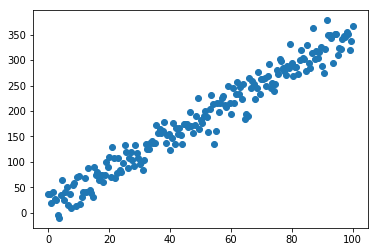

In [6]:
plt.plot(x, y, 'o')

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

That's all we needed to define our model and fit it. In Machine Learning in Python it is common (I'm not sure if this is always true) to have 2 steps:
* Defining the model (usually calling a class)
* Fitting the model (with the method `fit`)

Prediction can then be done with the method `predict`

In [9]:
pred = model.predict(x.reshape(-1, 1))

Now we plot the results

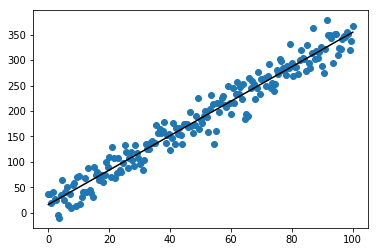

In [10]:
plt.plot(x, y, 'o')
plt.plot(x, pred, 'k')
plt.show()

We can also check the parameters of the regression

In [11]:
print(model.coef_)
print(model.intercept_)

[3.38921917]
15.964762822234263


## Classification

In this section we classify a toy dataset that depends on two variables, x and y. Our points can have the value 0 if they belong to one class or 1 if they belong to the other one. 

Preprocessing and using a pipeline are also explained

### Bulding the toy dataset
x and y are chosen arbitrarily so that there is some overlap

In [12]:
x1 = np.random.uniform(20, 50, 100)
y1 = 0.1 * x1 + np.random.normal(5, 5, 100)
z1 = np.full_like(x1, 0)

In [13]:
x2 = np.random.uniform(40, 70, 100)
y2 = x2 * 0.2 + np.random.normal(4, 4, 100)
z2 = np.full_like(x2, 1)

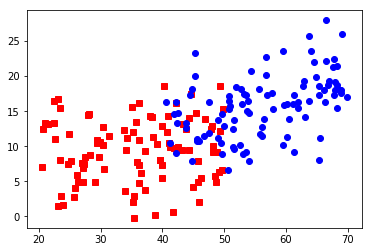

In [14]:
plt.plot(x1, y1, 'sr')
plt.plot(x2, y2, 'ob')

In [15]:
ary1 = np.concatenate((x1, y1, z1)).reshape(3, -1).T
ary2 = np.concatenate((x2, y2, z2)).reshape(3, -1).T

In [16]:
train = np.concatenate((ary1[:50], ary2[:50]))
test = np.concatenate((ary1[50:], ary2[50:]))
x_train = train[:, :2]
y_train = train[:, -1]
x_test = test[:, :2]
y_test = test[:, -1]

In [17]:
# Another way of splitting between train and test
from sklearn.model_selection import train_test_split
temp = np.concatenate((train, test))
new_x_train, new_x_test, new_y_train, new_y_test =\
train_test_split(temp[:, :2], temp[:, -1], test_size=100, shuffle=False)
print(np.all(new_x_train == x_train), np.all(new_x_test == x_test))


True True


### One way of doing the preprocessing + predictions

First, we fit the scaler with the data for training.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
print(x_train_scaled.mean(axis=0))
print(x_train_scaled.std(axis=0))

[ 6.06528716e-16 -4.86277685e-16]
[1. 1.]


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaled, y_train)
pred = model.predict(scaler.transform(x_test))
print(pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


### Another way: The Pipeline
The scikit-learn library introduces a useful tool: the **pipeline**. 

The pipeline let us combine easily the preprocessing steps and the fitting, without having to worry about keeping the parameters of the scaler, for example. 

The only requirement is that each class has a `fit` and `transform` method (we can make our own classes to be included in the pipeline)

In [20]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(),
                         LogisticRegression())
pipeline.fit(x_train, y_train)
pred = pipeline.predict(x_test)
print(pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


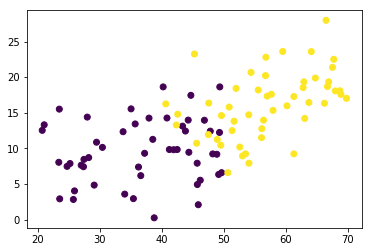

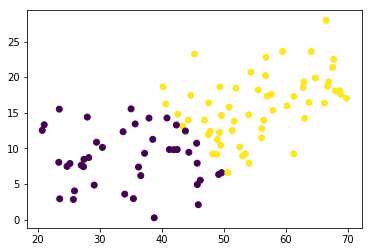

In [21]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.show()
plt.scatter(x_test[:, 0], x_test[:, 1], c=pred)

## Neural Network
Now we are going to do an example of a silly neural network

We need [keras](https://keras.io/)
keras is a python library and it's a layer built upon the underlying backend that deals with all the computations inside the neural network. It helps to simplify while being backend-agnostic

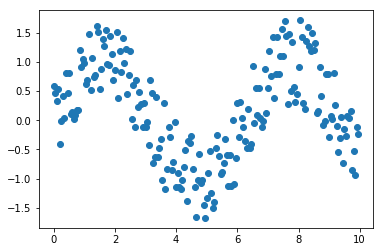

In [22]:
x = np.arange(0, 10, 0.05)
y = np.sin(x) + np.random.uniform(-0.75, 0.75, x.size)
plt.plot(x, y, 'o')

We are going to use a sequential model, that is, a linear stack of layers

In [23]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [24]:
model = Sequential()
model.add(Dense(units=14, activation='relu', input_shape=(1, )))
model.add(Dense(units=30))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam')

In [25]:
train_history = model.fit(x.reshape(-1, 1), y, epochs=1000)

Epoch 1/1000
200/200 [==============================] - 0s 733us/step - loss: 0.6963
Epoch 2/1000
200/200 [==============================] - 0s 27us/step - loss: 0.6903
Epoch 3/1000
200/200 [==============================] - 0s 47us/step - loss: 0.7057
Epoch 4/1000
200/200 [==============================] - 0s 40us/step - loss: 0.6808
Epoch 5/1000
200/200 [==============================] - 0s 52us/step - loss: 0.6798
Epoch 6/1000
200/200 [==============================] - 0s 71us/step - loss: 0.6795
Epoch 7/1000
200/200 [==============================] - 0s 73us/step - loss: 0.6694
Epoch 8/1000
200/200 [==============================] - 0s 61us/step - loss: 0.6891
Epoch 9/1000
200/200 [==============================] - 0s 67us/step - loss: 0.6772
Epoch 10/1000
200/200 [==============================] - 0s 56us/step - loss: 0.6829
Epoch 11/1000
200/200 [==============================] - 0s 53us/step - loss: 0.6857
Epoch 12/1000
200/200 [==============================] - 0s 46us/step - l

200/200 [==============================] - 0s 30us/step - loss: 0.4081
Epoch 98/1000
200/200 [==============================] - 0s 28us/step - loss: 0.4070
Epoch 99/1000
200/200 [==============================] - 0s 29us/step - loss: 0.4042
Epoch 100/1000
200/200 [==============================] - 0s 24us/step - loss: 0.4385
Epoch 101/1000
200/200 [==============================] - 0s 35us/step - loss: 0.4764
Epoch 102/1000
200/200 [==============================] - 0s 38us/step - loss: 0.4385
Epoch 103/1000
200/200 [==============================] - 0s 28us/step - loss: 0.3985
Epoch 104/1000
200/200 [==============================] - 0s 37us/step - loss: 0.4364
Epoch 105/1000
200/200 [==============================] - 0s 38us/step - loss: 0.3946
Epoch 106/1000
200/200 [==============================] - 0s 29us/step - loss: 0.4013
Epoch 107/1000
200/200 [==============================] - 0s 43us/step - loss: 0.3894
Epoch 108/1000
200/200 [==============================] - 0s 31us/step 

200/200 [==============================] - 0s 26us/step - loss: 0.3819
Epoch 193/1000
200/200 [==============================] - 0s 30us/step - loss: 0.3801
Epoch 194/1000
200/200 [==============================] - 0s 45us/step - loss: 0.3839
Epoch 195/1000
200/200 [==============================] - 0s 36us/step - loss: 0.3840
Epoch 196/1000
200/200 [==============================] - 0s 27us/step - loss: 0.3855
Epoch 197/1000
200/200 [==============================] - 0s 29us/step - loss: 0.3853
Epoch 198/1000
200/200 [==============================] - 0s 39us/step - loss: 0.3813
Epoch 199/1000
200/200 [==============================] - 0s 27us/step - loss: 0.3808
Epoch 200/1000
200/200 [==============================] - 0s 33us/step - loss: 0.3861
Epoch 201/1000
200/200 [==============================] - 0s 39us/step - loss: 0.3864
Epoch 202/1000
200/200 [==============================] - 0s 34us/step - loss: 0.3766
Epoch 203/1000
200/200 [==============================] - 0s 39us/ste

200/200 [==============================] - 0s 48us/step - loss: 0.3402
Epoch 288/1000
200/200 [==============================] - 0s 30us/step - loss: 0.3436
Epoch 289/1000
200/200 [==============================] - 0s 28us/step - loss: 0.3362
Epoch 290/1000
200/200 [==============================] - 0s 24us/step - loss: 0.3434
Epoch 291/1000
200/200 [==============================] - 0s 30us/step - loss: 0.3400
Epoch 292/1000
200/200 [==============================] - 0s 41us/step - loss: 0.3366
Epoch 293/1000
200/200 [==============================] - 0s 29us/step - loss: 0.3391
Epoch 294/1000
200/200 [==============================] - 0s 27us/step - loss: 0.3372
Epoch 295/1000
200/200 [==============================] - 0s 32us/step - loss: 0.3361
Epoch 296/1000
200/200 [==============================] - 0s 29us/step - loss: 0.3367
Epoch 297/1000
200/200 [==============================] - 0s 42us/step - loss: 0.3345
Epoch 298/1000
200/200 [==============================] - 0s 31us/ste

200/200 [==============================] - 0s 31us/step - loss: 0.2713
Epoch 383/1000
200/200 [==============================] - 0s 45us/step - loss: 0.2691
Epoch 384/1000
200/200 [==============================] - 0s 24us/step - loss: 0.2694
Epoch 385/1000
200/200 [==============================] - 0s 26us/step - loss: 0.2664
Epoch 386/1000
200/200 [==============================] - 0s 35us/step - loss: 0.2715
Epoch 387/1000
200/200 [==============================] - 0s 37us/step - loss: 0.2647
Epoch 388/1000
200/200 [==============================] - 0s 44us/step - loss: 0.2666
Epoch 389/1000
200/200 [==============================] - 0s 32us/step - loss: 0.2657
Epoch 390/1000
200/200 [==============================] - 0s 44us/step - loss: 0.2644
Epoch 391/1000
200/200 [==============================] - 0s 28us/step - loss: 0.2654
Epoch 392/1000
200/200 [==============================] - 0s 38us/step - loss: 0.2697
Epoch 393/1000
200/200 [==============================] - 0s 29us/ste

200/200 [==============================] - 0s 36us/step - loss: 0.2055
Epoch 478/1000
200/200 [==============================] - 0s 43us/step - loss: 0.2164
Epoch 479/1000
200/200 [==============================] - 0s 27us/step - loss: 0.2123
Epoch 480/1000
200/200 [==============================] - 0s 26us/step - loss: 0.2101
Epoch 481/1000
200/200 [==============================] - 0s 26us/step - loss: 0.2051
Epoch 482/1000
200/200 [==============================] - 0s 32us/step - loss: 0.2050
Epoch 483/1000
200/200 [==============================] - 0s 43us/step - loss: 0.1964
Epoch 484/1000
200/200 [==============================] - 0s 44us/step - loss: 0.2041
Epoch 485/1000
200/200 [==============================] - 0s 32us/step - loss: 0.1996
Epoch 486/1000
200/200 [==============================] - 0s 39us/step - loss: 0.2020
Epoch 487/1000
200/200 [==============================] - 0s 29us/step - loss: 0.2001
Epoch 488/1000
200/200 [==============================] - 0s 40us/ste

200/200 [==============================] - 0s 23us/step - loss: 0.1840
Epoch 573/1000
200/200 [==============================] - 0s 30us/step - loss: 0.1829
Epoch 574/1000
200/200 [==============================] - 0s 28us/step - loss: 0.1825
Epoch 575/1000
200/200 [==============================] - 0s 32us/step - loss: 0.1843
Epoch 576/1000
200/200 [==============================] - 0s 34us/step - loss: 0.1859
Epoch 577/1000
200/200 [==============================] - 0s 28us/step - loss: 0.1899
Epoch 578/1000
200/200 [==============================] - 0s 63us/step - loss: 0.1889
Epoch 579/1000
200/200 [==============================] - 0s 40us/step - loss: 0.1904
Epoch 580/1000
200/200 [==============================] - 0s 30us/step - loss: 0.1924
Epoch 581/1000
200/200 [==============================] - 0s 34us/step - loss: 0.1835
Epoch 582/1000
200/200 [==============================] - 0s 44us/step - loss: 0.1916
Epoch 583/1000
200/200 [==============================] - 0s 41us/ste

200/200 [==============================] - 0s 28us/step - loss: 0.1921
Epoch 668/1000
200/200 [==============================] - 0s 36us/step - loss: 0.1813
Epoch 669/1000
200/200 [==============================] - 0s 28us/step - loss: 0.1889
Epoch 670/1000
200/200 [==============================] - 0s 43us/step - loss: 0.1984
Epoch 671/1000
200/200 [==============================] - 0s 29us/step - loss: 0.1788
Epoch 672/1000
200/200 [==============================] - 0s 35us/step - loss: 0.1846
Epoch 673/1000
200/200 [==============================] - 0s 41us/step - loss: 0.1821
Epoch 674/1000
200/200 [==============================] - 0s 37us/step - loss: 0.1823
Epoch 675/1000
200/200 [==============================] - 0s 40us/step - loss: 0.1857
Epoch 676/1000
200/200 [==============================] - 0s 35us/step - loss: 0.1873
Epoch 677/1000
200/200 [==============================] - 0s 47us/step - loss: 0.1800
Epoch 678/1000
200/200 [==============================] - 0s 37us/ste

200/200 [==============================] - 0s 31us/step - loss: 0.1802
Epoch 763/1000
200/200 [==============================] - 0s 27us/step - loss: 0.1803
Epoch 764/1000
200/200 [==============================] - 0s 36us/step - loss: 0.1815
Epoch 765/1000
200/200 [==============================] - 0s 35us/step - loss: 0.1830
Epoch 766/1000
200/200 [==============================] - 0s 25us/step - loss: 0.1775
Epoch 767/1000
200/200 [==============================] - 0s 39us/step - loss: 0.1814
Epoch 768/1000
200/200 [==============================] - 0s 32us/step - loss: 0.1803
Epoch 769/1000
200/200 [==============================] - 0s 44us/step - loss: 0.1817
Epoch 770/1000
200/200 [==============================] - 0s 28us/step - loss: 0.1881
Epoch 771/1000
200/200 [==============================] - 0s 32us/step - loss: 0.1821
Epoch 772/1000
200/200 [==============================] - 0s 35us/step - loss: 0.1856
Epoch 773/1000
200/200 [==============================] - 0s 33us/ste

200/200 [==============================] - 0s 28us/step - loss: 0.1850
Epoch 858/1000
200/200 [==============================] - 0s 25us/step - loss: 0.1826
Epoch 859/1000
200/200 [==============================] - 0s 33us/step - loss: 0.1787
Epoch 860/1000
200/200 [==============================] - 0s 28us/step - loss: 0.1869
Epoch 861/1000
200/200 [==============================] - 0s 44us/step - loss: 0.1806
Epoch 862/1000
200/200 [==============================] - 0s 48us/step - loss: 0.1831
Epoch 863/1000
200/200 [==============================] - 0s 36us/step - loss: 0.1826
Epoch 864/1000
200/200 [==============================] - 0s 31us/step - loss: 0.1855
Epoch 865/1000
200/200 [==============================] - 0s 49us/step - loss: 0.1779
Epoch 866/1000
200/200 [==============================] - 0s 27us/step - loss: 0.1820
Epoch 867/1000
200/200 [==============================] - 0s 51us/step - loss: 0.1834
Epoch 868/1000
200/200 [==============================] - 0s 51us/ste

200/200 [==============================] - 0s 24us/step - loss: 0.1764
Epoch 953/1000
200/200 [==============================] - 0s 28us/step - loss: 0.1743
Epoch 954/1000
200/200 [==============================] - 0s 30us/step - loss: 0.1739
Epoch 955/1000
200/200 [==============================] - 0s 39us/step - loss: 0.1742
Epoch 956/1000
200/200 [==============================] - 0s 29us/step - loss: 0.1758
Epoch 957/1000
200/200 [==============================] - 0s 24us/step - loss: 0.1766
Epoch 958/1000
200/200 [==============================] - 0s 32us/step - loss: 0.1820
Epoch 959/1000
200/200 [==============================] - 0s 41us/step - loss: 0.1808
Epoch 960/1000
200/200 [==============================] - 0s 37us/step - loss: 0.1774
Epoch 961/1000
200/200 [==============================] - 0s 38us/step - loss: 0.1772
Epoch 962/1000
200/200 [==============================] - 0s 31us/step - loss: 0.1775
Epoch 963/1000
200/200 [==============================] - 0s 39us/ste

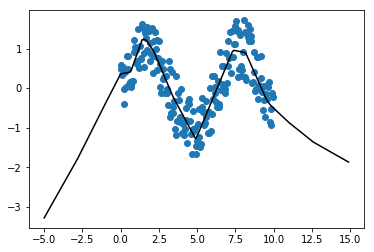

In [26]:
aux = np.arange(-5, 15, 0.1)
pred = model.predict(aux.reshape(-1, 1))

plt.plot(x, y, 'o')
plt.plot(aux, pred, 'k-')

[992]
[2]


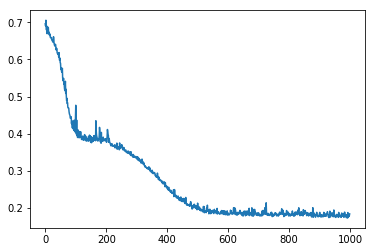

In [27]:
loss = train_history.history['loss']
print(np.where(loss == np.min(loss))[0])
print(np.where(loss == np.max(loss))[0])
plt.plot(loss)

## Validation

Usually we want to keep 3 separates subsets of the dataset
* **Training**: One for training, this is the one that is fit
* **Validation**: Another one to test the predictios while training, that is, testing the goodness of the generalization of the predictions
* **Test**: Another final one to test once the fit is complete

The first two subsets are used to tune the parameters while the last one is only used at the very end (otherwise we are fitting the test set and what we see is not the true generalization)

Let's try the neural network with cross validation (also available in scikit-learn)

In [28]:
train_history = model.fit(x.reshape(-1, 1), y, epochs=1000,
                         validation_split=0.2)

Train on 160 samples, validate on 40 samples
Epoch 1/1000
160/160 [==============================] - 0s 160us/step - loss: 0.1686 - val_loss: 0.2114
Epoch 2/1000
160/160 [==============================] - 0s 34us/step - loss: 0.1734 - val_loss: 0.2197
Epoch 3/1000
160/160 [==============================] - 0s 27us/step - loss: 0.1666 - val_loss: 0.2149
Epoch 4/1000
160/160 [==============================] - 0s 40us/step - loss: 0.1672 - val_loss: 0.2117
Epoch 5/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1675 - val_loss: 0.2100
Epoch 6/1000
160/160 [==============================] - 0s 69us/step - loss: 0.1689 - val_loss: 0.2085
Epoch 7/1000
160/160 [==============================] - 0s 48us/step - loss: 0.1647 - val_loss: 0.2061
Epoch 8/1000
160/160 [==============================] - 0s 36us/step - loss: 0.1664 - val_loss: 0.2074
Epoch 9/1000
160/160 [==============================] - 0s 28us/step - loss: 0.1640 - val_loss: 0.2091
Epoch 10/1000
160/160 [====

160/160 [==============================] - 0s 34us/step - loss: 0.1645 - val_loss: 0.2078
Epoch 80/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1649 - val_loss: 0.2089
Epoch 81/1000
160/160 [==============================] - 0s 51us/step - loss: 0.1642 - val_loss: 0.2098
Epoch 82/1000
160/160 [==============================] - 0s 29us/step - loss: 0.1648 - val_loss: 0.2074
Epoch 83/1000
160/160 [==============================] - 0s 28us/step - loss: 0.1640 - val_loss: 0.2072
Epoch 84/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1662 - val_loss: 0.2078
Epoch 85/1000
160/160 [==============================] - 0s 34us/step - loss: 0.1624 - val_loss: 0.2068
Epoch 86/1000
160/160 [==============================] - 0s 55us/step - loss: 0.1635 - val_loss: 0.2072
Epoch 87/1000
160/160 [==============================] - 0s 29us/step - loss: 0.1643 - val_loss: 0.2080
Epoch 88/1000
160/160 [==============================] - 0s 58us/step - loss: 

160/160 [==============================] - 0s 26us/step - loss: 0.1651 - val_loss: 0.2092
Epoch 158/1000
160/160 [==============================] - 0s 26us/step - loss: 0.1645 - val_loss: 0.2084
Epoch 159/1000
160/160 [==============================] - 0s 35us/step - loss: 0.1613 - val_loss: 0.2090
Epoch 160/1000
160/160 [==============================] - 0s 34us/step - loss: 0.1641 - val_loss: 0.2083
Epoch 161/1000
160/160 [==============================] - 0s 39us/step - loss: 0.1627 - val_loss: 0.2085
Epoch 162/1000
160/160 [==============================] - 0s 40us/step - loss: 0.1621 - val_loss: 0.2084
Epoch 163/1000
160/160 [==============================] - 0s 31us/step - loss: 0.1653 - val_loss: 0.2087
Epoch 164/1000
160/160 [==============================] - 0s 34us/step - loss: 0.1617 - val_loss: 0.2088
Epoch 165/1000
160/160 [==============================] - 0s 43us/step - loss: 0.1651 - val_loss: 0.2090
Epoch 166/1000
160/160 [==============================] - 0s 45us/step

160/160 [==============================] - 0s 28us/step - loss: 0.1642 - val_loss: 0.2105
Epoch 236/1000
160/160 [==============================] - 0s 33us/step - loss: 0.1656 - val_loss: 0.2107
Epoch 237/1000
160/160 [==============================] - 0s 42us/step - loss: 0.1676 - val_loss: 0.2133
Epoch 238/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1644 - val_loss: 0.2133
Epoch 239/1000
160/160 [==============================] - 0s 41us/step - loss: 0.1648 - val_loss: 0.2115
Epoch 240/1000
160/160 [==============================] - 0s 36us/step - loss: 0.1662 - val_loss: 0.2119
Epoch 241/1000
160/160 [==============================] - 0s 53us/step - loss: 0.1638 - val_loss: 0.2141
Epoch 242/1000
160/160 [==============================] - 0s 38us/step - loss: 0.1643 - val_loss: 0.2114
Epoch 243/1000
160/160 [==============================] - 0s 37us/step - loss: 0.1637 - val_loss: 0.2119
Epoch 244/1000
160/160 [==============================] - 0s 58us/step

160/160 [==============================] - 0s 51us/step - loss: 0.1702 - val_loss: 0.2172
Epoch 314/1000
160/160 [==============================] - 0s 27us/step - loss: 0.1600 - val_loss: 0.2171
Epoch 315/1000
160/160 [==============================] - 0s 56us/step - loss: 0.1683 - val_loss: 0.2163
Epoch 316/1000
160/160 [==============================] - 0s 49us/step - loss: 0.1652 - val_loss: 0.2227
Epoch 317/1000
160/160 [==============================] - 0s 29us/step - loss: 0.1618 - val_loss: 0.2185
Epoch 318/1000
160/160 [==============================] - 0s 55us/step - loss: 0.1639 - val_loss: 0.2195
Epoch 319/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1612 - val_loss: 0.2178
Epoch 320/1000
160/160 [==============================] - 0s 28us/step - loss: 0.1611 - val_loss: 0.2179
Epoch 321/1000
160/160 [==============================] - 0s 45us/step - loss: 0.1657 - val_loss: 0.2202
Epoch 322/1000
160/160 [==============================] - 0s 36us/step

160/160 [==============================] - 0s 35us/step - loss: 0.1649 - val_loss: 0.2292
Epoch 392/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1663 - val_loss: 0.2299
Epoch 393/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1660 - val_loss: 0.2317
Epoch 394/1000
160/160 [==============================] - 0s 49us/step - loss: 0.1618 - val_loss: 0.2279
Epoch 395/1000
160/160 [==============================] - 0s 31us/step - loss: 0.1648 - val_loss: 0.2349
Epoch 396/1000
160/160 [==============================] - 0s 42us/step - loss: 0.1673 - val_loss: 0.2342
Epoch 397/1000
160/160 [==============================] - 0s 36us/step - loss: 0.1639 - val_loss: 0.2319
Epoch 398/1000
160/160 [==============================] - 0s 47us/step - loss: 0.1634 - val_loss: 0.2357
Epoch 399/1000
160/160 [==============================] - 0s 38us/step - loss: 0.1641 - val_loss: 0.2384
Epoch 400/1000
160/160 [==============================] - 0s 49us/step

160/160 [==============================] - 0s 45us/step - loss: 0.1657 - val_loss: 0.2474
Epoch 470/1000
160/160 [==============================] - 0s 46us/step - loss: 0.1634 - val_loss: 0.2479
Epoch 471/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1650 - val_loss: 0.2420
Epoch 472/1000
160/160 [==============================] - 0s 26us/step - loss: 0.1641 - val_loss: 0.2501
Epoch 473/1000
160/160 [==============================] - 0s 27us/step - loss: 0.1636 - val_loss: 0.2506
Epoch 474/1000
160/160 [==============================] - 0s 26us/step - loss: 0.1606 - val_loss: 0.2447
Epoch 475/1000
160/160 [==============================] - 0s 33us/step - loss: 0.1649 - val_loss: 0.2397
Epoch 476/1000
160/160 [==============================] - 0s 47us/step - loss: 0.1702 - val_loss: 0.2509
Epoch 477/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1663 - val_loss: 0.2532
Epoch 478/1000
160/160 [==============================] - 0s 29us/step

160/160 [==============================] - 0s 37us/step - loss: 0.1615 - val_loss: 0.2662
Epoch 548/1000
160/160 [==============================] - 0s 30us/step - loss: 0.1642 - val_loss: 0.2579
Epoch 549/1000
160/160 [==============================] - 0s 37us/step - loss: 0.1653 - val_loss: 0.2645
Epoch 550/1000
160/160 [==============================] - 0s 51us/step - loss: 0.1680 - val_loss: 0.2684
Epoch 551/1000
160/160 [==============================] - 0s 27us/step - loss: 0.1617 - val_loss: 0.2639
Epoch 552/1000
160/160 [==============================] - 0s 29us/step - loss: 0.1619 - val_loss: 0.2670
Epoch 553/1000
160/160 [==============================] - 0s 36us/step - loss: 0.1619 - val_loss: 0.2720
Epoch 554/1000
160/160 [==============================] - 0s 47us/step - loss: 0.1688 - val_loss: 0.2662
Epoch 555/1000
160/160 [==============================] - 0s 43us/step - loss: 0.1667 - val_loss: 0.2693
Epoch 556/1000
160/160 [==============================] - 0s 44us/step

160/160 [==============================] - 0s 36us/step - loss: 0.1647 - val_loss: 0.2699
Epoch 626/1000
160/160 [==============================] - 0s 52us/step - loss: 0.1613 - val_loss: 0.2790
Epoch 627/1000
160/160 [==============================] - 0s 54us/step - loss: 0.1660 - val_loss: 0.2838
Epoch 628/1000
160/160 [==============================] - 0s 46us/step - loss: 0.1671 - val_loss: 0.2778
Epoch 629/1000
160/160 [==============================] - 0s 44us/step - loss: 0.1640 - val_loss: 0.2833
Epoch 630/1000
160/160 [==============================] - 0s 28us/step - loss: 0.1612 - val_loss: 0.2739
Epoch 631/1000
160/160 [==============================] - 0s 49us/step - loss: 0.1622 - val_loss: 0.2757
Epoch 632/1000
160/160 [==============================] - 0s 37us/step - loss: 0.1596 - val_loss: 0.2861
Epoch 633/1000
160/160 [==============================] - 0s 36us/step - loss: 0.1625 - val_loss: 0.2956
Epoch 634/1000
160/160 [==============================] - 0s 34us/step

160/160 [==============================] - 0s 32us/step - loss: 0.1614 - val_loss: 0.3014
Epoch 704/1000
160/160 [==============================] - 0s 35us/step - loss: 0.1603 - val_loss: 0.2907
Epoch 705/1000
160/160 [==============================] - 0s 57us/step - loss: 0.1616 - val_loss: 0.2910
Epoch 706/1000
160/160 [==============================] - 0s 30us/step - loss: 0.1676 - val_loss: 0.2972
Epoch 707/1000
160/160 [==============================] - 0s 30us/step - loss: 0.1686 - val_loss: 0.2902
Epoch 708/1000
160/160 [==============================] - 0s 33us/step - loss: 0.1602 - val_loss: 0.2936
Epoch 709/1000
160/160 [==============================] - 0s 46us/step - loss: 0.1635 - val_loss: 0.2948
Epoch 710/1000
160/160 [==============================] - 0s 46us/step - loss: 0.1650 - val_loss: 0.2919
Epoch 711/1000
160/160 [==============================] - 0s 55us/step - loss: 0.1613 - val_loss: 0.2935
Epoch 712/1000
160/160 [==============================] - 0s 80us/step

160/160 [==============================] - 0s 32us/step - loss: 0.1626 - val_loss: 0.3064
Epoch 782/1000
160/160 [==============================] - 0s 44us/step - loss: 0.1617 - val_loss: 0.3083
Epoch 783/1000
160/160 [==============================] - 0s 28us/step - loss: 0.1616 - val_loss: 0.3060
Epoch 784/1000
160/160 [==============================] - 0s 45us/step - loss: 0.1605 - val_loss: 0.3122
Epoch 785/1000
160/160 [==============================] - 0s 35us/step - loss: 0.1619 - val_loss: 0.3091
Epoch 786/1000
160/160 [==============================] - 0s 48us/step - loss: 0.1610 - val_loss: 0.3059
Epoch 787/1000
160/160 [==============================] - 0s 37us/step - loss: 0.1623 - val_loss: 0.3100
Epoch 788/1000
160/160 [==============================] - 0s 66us/step - loss: 0.1633 - val_loss: 0.3016
Epoch 789/1000
160/160 [==============================] - 0s 34us/step - loss: 0.1588 - val_loss: 0.3175
Epoch 790/1000
160/160 [==============================] - 0s 33us/step

160/160 [==============================] - 0s 50us/step - loss: 0.1648 - val_loss: 0.3111
Epoch 860/1000
160/160 [==============================] - 0s 30us/step - loss: 0.1743 - val_loss: 0.3268
Epoch 861/1000
160/160 [==============================] - 0s 27us/step - loss: 0.1599 - val_loss: 0.3209
Epoch 862/1000
160/160 [==============================] - 0s 32us/step - loss: 0.1647 - val_loss: 0.3273
Epoch 863/1000
160/160 [==============================] - 0s 31us/step - loss: 0.1619 - val_loss: 0.3176
Epoch 864/1000
160/160 [==============================] - 0s 48us/step - loss: 0.1622 - val_loss: 0.3196
Epoch 865/1000
160/160 [==============================] - 0s 31us/step - loss: 0.1621 - val_loss: 0.3273
Epoch 866/1000
160/160 [==============================] - 0s 42us/step - loss: 0.1630 - val_loss: 0.3247
Epoch 867/1000
160/160 [==============================] - 0s 44us/step - loss: 0.1625 - val_loss: 0.3291
Epoch 868/1000
160/160 [==============================] - 0s 43us/step

160/160 [==============================] - 0s 38us/step - loss: 0.1614 - val_loss: 0.3522
Epoch 938/1000
160/160 [==============================] - 0s 39us/step - loss: 0.1583 - val_loss: 0.3776
Epoch 939/1000
160/160 [==============================] - 0s 45us/step - loss: 0.1607 - val_loss: 0.3954
Epoch 940/1000
160/160 [==============================] - 0s 35us/step - loss: 0.1566 - val_loss: 0.3535
Epoch 941/1000
160/160 [==============================] - 0s 38us/step - loss: 0.1594 - val_loss: 0.3585
Epoch 942/1000
160/160 [==============================] - 0s 34us/step - loss: 0.1581 - val_loss: 0.3805
Epoch 943/1000
160/160 [==============================] - 0s 35us/step - loss: 0.1576 - val_loss: 0.3696
Epoch 944/1000
160/160 [==============================] - 0s 39us/step - loss: 0.1700 - val_loss: 0.3582
Epoch 945/1000
160/160 [==============================] - 0s 38us/step - loss: 0.1598 - val_loss: 0.3690
Epoch 946/1000
160/160 [==============================] - 0s 47us/step

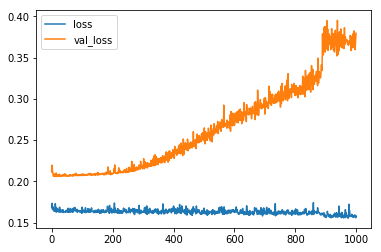

In [29]:
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()